# 경로 설정

In [17]:
import seaborn as sns

In [1]:
path = '../data/'
import os
os.listdir(path)

['competition_data.zip',
 'real_final_test.csv',
 'real_final_train.csv',
 'sample_submission.csv',
 'submission.csv',
 'test.csv',
 'train.csv']

# Data Load

In [2]:
import pandas as pd

train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

In [3]:
print(train.shape)
print(test.shape)

(15000, 70)
(35452, 69)


In [4]:
train.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,...,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,...,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,...,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,...,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0


In [5]:
train.drop(columns=['index','country'], inplace = True)
test.drop(columns=['index','country'], inplace = True)

# 실험 환경 구축

In [6]:
import jinja2
from pycaret.classification import *

In [7]:
clf = setup(data = train, target = 'nerdiness')

,Description,Value
0,session_id,2609
1,Target,nerdiness
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15000, 68)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,63
8,Ordinal Features,False
9,High Cardinality Features,False


# 모델 3개 제작

In [8]:
best_3 = compare_models(sort = 'AUC', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7692,0.8565,0.8316,0.7701,0.7996,0.5285,0.5308,0.3230
rf,Random Forest Classifier,0.7688,0.8519,0.8305,0.7702,0.7992,0.5278,0.5299,0.2490
catboost,CatBoost Classifier,0.7542,0.8263,0.8169,0.7580,0.7863,0.4979,0.4999,1.2880
xgboost,Extreme Gradient Boosting,0.7531,0.8250,0.8032,0.7634,0.7827,0.4973,0.4984,1.1420
lightgbm,Light Gradient Boosting Machine,0.7439,0.8179,0.8049,0.7506,0.7768,0.4772,0.4789,0.1790
gbc,Gradient Boosting Classifier,0.7339,0.8021,0.7978,0.7413,0.7685,0.4566,0.4584,0.7770
lda,Linear Discriminant Analysis,0.7277,0.7949,0.7872,0.7384,0.7620,0.4446,0.4459,0.1530
ada,Ada Boost Classifier,0.7222,0.7913,0.7789,0.7352,0.7563,0.4338,0.4349,0.1880
dt,Decision Tree Classifier,0.6906,0.6876,0.7161,0.7228,0.7193,0.3747,0.3750,0.0750
nb,Naive Bayes,0.4721,0.6789,0.0962,0.5915,0.0845,0.0363,0.0420,0.0290


# 모델 앙상블

In [9]:
blended = blend_models(estimator_list = best_3, fold = 5, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7710,0.8529,0.8287,0.7735,0.8002,0.5326,0.5344
1,0.7571,0.8404,0.8253,0.7575,0.7900,0.5034,0.5060
2,0.7757,0.8637,0.8366,0.7759,0.8051,0.5418,0.5440
3,0.7648,0.8601,0.8298,0.7653,0.7962,0.5191,0.5215
4,0.7608,0.8416,0.8348,0.7578,0.7944,0.5101,0.5136
Mean,0.7659,0.8517,0.8310,0.7660,0.7972,0.5214,0.5239
SD,0.0067,0.0095,0.0041,0.0077,0.0052,0.0141,0.0138


In [10]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7843,0.8663,0.8410,0.7846,0.8119,0.5598,0.5616


#  전체 데이터에 대한 재학습

In [11]:
final_model = finalize_model(blended)

# test set에 대한 예측

In [12]:
predictions = predict_model(final_model, data = test)

In [13]:
predictions

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,age,hand,religion,orientation,voted,married,familysize,ASD,Label,Score
0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,5.0,...,19,1.0,4.0,4.0,1.0,1.0,3.0,2.0,0,0.7331
1,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,...,33,1.0,1.0,5.0,2.0,1.0,5.0,2.0,1,0.8051
2,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,...,13,1.0,4.0,5.0,2.0,1.0,3.0,2.0,1,0.8488
3,5.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,...,28,1.0,2.0,2.0,2.0,1.0,3.0,2.0,1,0.6302
4,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,...,15,1.0,4.0,5.0,2.0,1.0,2.0,2.0,1,0.8589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35447,4.0,5.0,5.0,3.0,3.0,4.0,5.0,5.0,4.0,3.0,...,16,3.0,10.0,4.0,2.0,1.0,3.0,2.0,1,0.8446
35448,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,3.0,...,16,3.0,2.0,5.0,2.0,1.0,2.0,2.0,1,0.7913
35449,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,31,1.0,1.0,5.0,1.0,1.0,2.0,2.0,1,0.9324
35450,5.0,5.0,4.0,5.0,5.0,1.0,5.0,1.0,5.0,5.0,...,19,1.0,12.0,1.0,2.0,1.0,NaN,2.0,0,0.7977


In [14]:
submission = pd.read_csv(path + 'sample_submission.csv')

In [15]:
submission['nerdiness'] = predictions['Label']

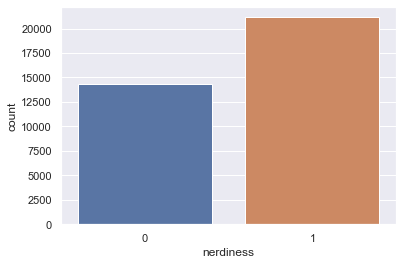

In [18]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="nerdiness", data=submission)